In [1]:
import numpy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

First load our delay spectra

In [2]:
fin_eq14_xx = numpy.load("/Users/jameskent/Downloads/eq14_xx_low.npz")
fin_eq14_xx_lst = numpy.load("/Users/jameskent/Downloads/delay_spectrum_data/lst_eq14.npz")
fin_eq28_xx = numpy.load("/Users/jameskent/Downloads/eq28_xx_low.npz")
fin_eq28_xx_lst = numpy.load("/Users/jameskent/Downloads/delay_spectrum_data/lst_eq28.npz")
fin_eq14_yy = numpy.load("/Users/jameskent/Downloads/eq14_yy_low.npz")
fin_eq14_yy_lst = numpy.load("/Users/jameskent/Downloads/delay_spectrum_data/lst_eq14_yy.npz")
fin_eq28_yy = numpy.load("/Users/jameskent/Downloads/eq28_yy_low.npz")
fin_eq28_yy_lst = numpy.load("/Users/jameskent/Downloads/delay_spectrum_data/lst_eq28_yy.npz")

In [3]:
ds_eq14_xx = fin_eq14_xx['delay_spectrum']
ds_eq28_xx = fin_eq28_xx['delay_spectrum']
ds_eq14_yy = fin_eq14_yy['delay_spectrum']
ds_eq28_yy = fin_eq28_yy['delay_spectrum']

eq14_xx_lst = fin_eq14_xx_lst['lst']
eq28_xx_lst = fin_eq28_xx_lst['lst']
eq14_yy_lst = fin_eq14_yy_lst['lst']
eq28_yy_lst = fin_eq28_yy_lst['lst']
print(ds_eq14_xx.shape)

(128,)


Then load Nick Kern's calibrated data...

In [4]:
fin_snr_map_xx = numpy.load("/Users/jameskent/Downloads/HERA_SnR_maps/snrmap_xx.npz")
fin_snr_map_yy = numpy.load("/Users/jameskent/Downloads/HERA_SnR_maps/snrmap_xx.npz")
visamp_xx = fin_snr_map_xx['visamp']
visamp_yy = fin_snr_map_yy['visamp']
lst_visamp_xx = fin_snr_map_xx['last']
lst_visamp_yy = fin_snr_map_yy['last']

In [5]:
print(visamp_xx.shape)
print(lst_visamp_xx[475:525])

(6, 1024, 2400)
[0.81042167 0.81198333 0.813545   0.81510667 0.81666833 0.81849
 0.82005167 0.82161333 0.823175   0.82473667 0.82629833 0.82786
 0.82942167 0.83098333 0.832545   0.83410667 0.83566833 0.83723
 0.83879167 0.84035333 0.841915   0.84347667 0.84503833 0.8466
 0.84816167 0.84972333 0.851285   0.85284667 0.85440833 0.85597
 0.85753167 0.85909333 0.860655   0.86221667 0.86377833 0.86534
 0.86690167 0.86846333 0.870025   0.87158667 0.87314833 0.87471
 0.87627167 0.87783333 0.879395   0.88095667 0.88251833 0.88408
 0.88564167 0.88720333]


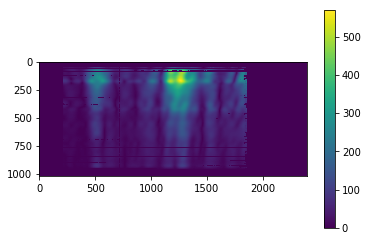

In [6]:
plt.imshow(numpy.abs(visamp_xx[0,:,:]))
plt.colorbar()
plt.show()

In [7]:
cal_strip = numpy.median(numpy.abs(visamp_xx[0,:,530:570]),axis=1)
print(cal_strip.shape)

(1024,)


# plt.plot(numpy.arange(0,1024),cal_strip)
plt.show()

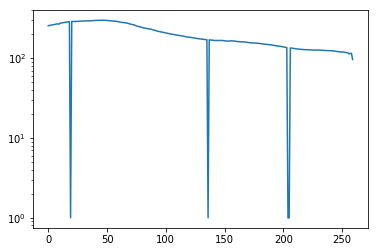

In [8]:
plt.plot(numpy.arange(0,380-120),numpy.abs(cal_strip[120:380]))
plt.yscale('log')
plt.show()

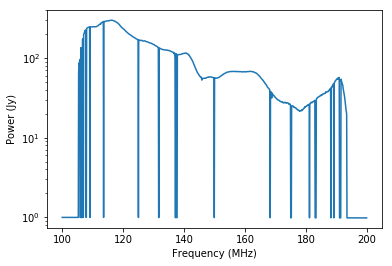

In [9]:
plt.plot(100+(100/1024)*numpy.arange(0,1024), numpy.abs(cal_strip))
plt.yscale('log')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (Jy)')
plt.savefig('visibilities.pdf')
plt.show()

In [10]:
scale_value = numpy.mean(visamp_xx[0,120:380,500])
scale_value_abs = abs(scale_value)**2
print(abs(scale_value)**2)

38511.33153034747


# Scale delay spectrum to $Jy Hz$

In [11]:
#H_0 value based on planck 2018 (non-correlated with BAO) results

def compute_e_z(z,omega_m=0.3147, omega_k=0, omega_lambda=0.6847):
    return numpy.sqrt(omega_m*((1+z)**3)+omega_k*((1+z)**2) + omega_lambda)

def compute_k_parallel(tau,z,rest_frequency=1.4e9, h_0=67.37e3, c=3e8):
    x1 = 2 * numpy.pi * tau * rest_frequency * h_0 * compute_e_z(z)
    x2 = c * ((1+z)**2)
    return (x1/x2)

def compute_k_parallel_h(tau,z,rest_frequency=1.4e9, ckm=3e5):
    x1 = 2 * numpy.pi * tau * rest_frequency * 100 * compute_e_z(z)
    x2 = ckm * ((1+z)**2)
    return (x1/x2)

In [12]:
print(100*compute_e_z(10.42))

2166.52904234769


In [13]:
delay_range = numpy.arange(0,128)*78.125 - 78.125*64
k_parallel_range = compute_k_parallel_h(delay_range*1e-9,10.42)
k_parallel_range


array([-2.43550464, -2.39744988, -2.35939512, -2.32134036, -2.2832856 ,
       -2.24523084, -2.20717608, -2.16912132, -2.13106656, -2.0930118 ,
       -2.05495704, -2.01690228, -1.97884752, -1.94079276, -1.902738  ,
       -1.86468324, -1.82662848, -1.78857372, -1.75051896, -1.7124642 ,
       -1.67440944, -1.63635468, -1.59829992, -1.56024516, -1.5221904 ,
       -1.48413564, -1.44608088, -1.40802612, -1.36997136, -1.3319166 ,
       -1.29386184, -1.25580708, -1.21775232, -1.17969756, -1.1416428 ,
       -1.10358804, -1.06553328, -1.02747852, -0.98942376, -0.951369  ,
       -0.91331424, -0.87525948, -0.83720472, -0.79914996, -0.7610952 ,
       -0.72304044, -0.68498568, -0.64693092, -0.60887616, -0.5708214 ,
       -0.53276664, -0.49471188, -0.45665712, -0.41860236, -0.3805476 ,
       -0.34249284, -0.30443808, -0.26638332, -0.22832856, -0.1902738 ,
       -0.15221904, -0.11416428, -0.07610952, -0.03805476,  0.        ,
        0.03805476,  0.07610952,  0.11416428,  0.15221904,  0.19

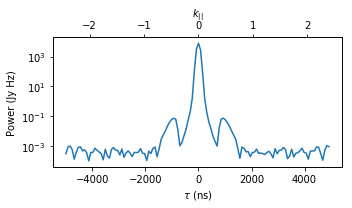

In [14]:
fig = plt.figure(figsize=(5,3))

ax1 = fig.add_subplot(111)
ax1.plot(delay_range,ds_eq14_xx*scale_value_abs)
ax1.set_xlabel(r'$ \tau $ (ns)')
ax1.set_ylabel('Power (Jy Hz)')
ax1.set_yscale('log')

ax2 = ax1.twiny()
ax2.plot(k_parallel_range,numpy.zeros(128))
ax2.set_xlabel(r'$k_{||}$')

plt.tight_layout()
plt.savefig('delay_spectrum.pdf')

plt.show()

In [15]:
print(compute_k_parallel(2000*1e-9,10.42))

0.6563197898745448


Now let's plot the bootstrapped plots for EQ14 and EQ28 for both XX and YY

38511.33153034747


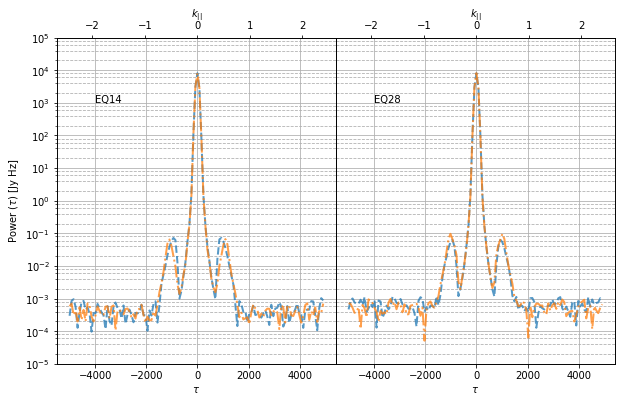

In [88]:
#Load Scaling Factors for all four plots
#scale_eq14_xx = numpy.sqrt(3*(numpy.abs(numpy.mean(visamp_xx[0,120:380,500]))**2))**2
#scale_eq28_xx = numpy.sqrt(3*(numpy.abs(numpy.mean(visamp_xx[1,120:380,500]))**2))**2
#scale_eq14_yy = numpy.sqrt(3*(numpy.abs(numpy.mean(visamp_yy[0,120:380,500]))**2))**2
#scale_eq28_yy = numpy.sqrt(3*(numpy.abs(numpy.mean(visamp_yy[1,120:380,500]))**2))**2

scale_eq14_xx = numpy.abs(numpy.mean(visamp_xx[0,120:380,500]))**2
scale_eq28_xx = numpy.abs(numpy.mean(visamp_xx[1,120:380,500]))**2
scale_eq14_yy = numpy.abs(numpy.mean(visamp_yy[0,120:380,500]))**2
scale_eq28_yy = numpy.abs(numpy.mean(visamp_yy[1,120:380,500]))**2

print(scale_eq14_xx)
fig = plt.figure(figsize=(10,6))
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.0, hspace=0) # set the spacing between axes. 

ax1 = fig.add_subplot(gs1[0])
ax1.plot(delay_range,ds_eq14_xx*scale_eq14_xx,linewidth=2.0,linestyle='--',alpha=0.75)
ax1.plot(delay_range,ds_eq14_yy*scale_eq14_yy,linewidth=2.0,linestyle='-.',alpha=0.75)
ax1.set_yscale('log')
ax1.set_xlabel(r'$\tau$')
ax1.set_ylabel(r'Power ($\tau$) [Jy Hz]')
ax2 = fig.add_subplot(gs1[1])
ax2.plot(delay_range,ds_eq28_xx*scale_eq28_xx,linewidth=2.0,linestyle='--',alpha=0.75)
ax2.plot(delay_range,ds_eq28_yy*scale_eq28_yy,linewidth=2.0,linestyle='-.',alpha=0.75)
ax2.set_xlabel(r'$\tau$')
ax2.set_yscale('log')

ax2.tick_params(
axis='both',
    which='both',
left=False)
ax2.set_yticks([])

#Setup grid
ax1.set_ylim([10e-6,10e4])
locmaj = mpl.ticker.LogLocator(base=10,numticks=11) 
locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=11)
ax1.yaxis.set_major_locator(locmaj)
ax1.yaxis.set_minor_locator(locmin)
ax1.grid(True,which="major")
ax1.grid(True,which='minor',ls='--')
ax2.set_ylim([10e-6,10e4])
ax2.yaxis.set_major_locator(locmaj)
ax2.yaxis.set_minor_locator(locmin)
ax2.yaxis.set_major_formatter(mpl.ticker.NullFormatter())
ax2.grid(True,which="major")
ax2.grid(True,which='minor',ls='--')
ax1.annotate('EQ14', (-4000,1000))
ax2.annotate('EQ28', (-4000,1000))
# Setup twin axes 

ax3 = ax1.twiny()
ax3.plot(k_parallel_range,numpy.zeros(128))
ax3.set_xlabel(r'$k_{||}$')
ax4 = ax2.twiny()
ax4.plot(k_parallel_range,numpy.zeros(128))
ax4.set_xlabel(r'$k_{||}$')

#plt.grid(True,which="both",ls="-")
plt.savefig("delay_spectrum_jansky.pdf")
plt.show()



We've now converted to Jy Hz.... now it is time to try and move to Power in cosmological units.

In [89]:
import scipy.integrate 
def compute_los_comoving_distance(z):
    d = scipy.integrate.quad(lambda z: 1/compute_e_z(z), 0, z)[0]
    return d * 3e5/100

In [90]:
D_z = compute_los_comoving_distance(10.42)

In [91]:
D_z

6560.219357525258

In [92]:
import scipy
def hanning_custom_window(N):
    return numpy.square(scipy.signal.hanning(N))

In [105]:
import hera_pspec as hp
beam_freqs = numpy.linspace(100e6, 200e6, 1024)
beam_gauss = hp.PSpecBeamGauss(fwhm=0.1, beam_freqs=beam_freqs)

# Use Plank 2018 Cosmological Parameters
beam_gauss.cosmo.Om_L = 0.6889
beam_gauss.cosmo.Om_M = 0.3111
beam_gauss.cosmo.H0 = 67.66
beam_gauss.cosmo.Om_k = 0.0005


print(beam_gauss.cosmo)
conversion_scalar = beam_gauss.compute_pspec_scalar(lower_freq=112e6, upper_freq=137e6, num_freqs=1024, 
                                         num_steps=5000, pol='YY', taper='hanning', 
                                         little_h=True)
print("Cosmological conversion scalar: ",conversion_scalar)
convert_jy_to_mk = beam_gauss.Jy_to_mK(120e6,pol='XX')
print("Temperature Conversion: ",convert_jy_to_mk[0])

Cosmo_Conversions object at <0x132d9f950>
Om_L : 0.6889; Om_b : 0.0491; Om_c : 0.2644; Om_M : 0.3111; Om_k : 0.0005; H0 : 67.6600
Cosmological conversion scalar:  1147511402.9394486
Temperature Conversion:  199.4809216449695


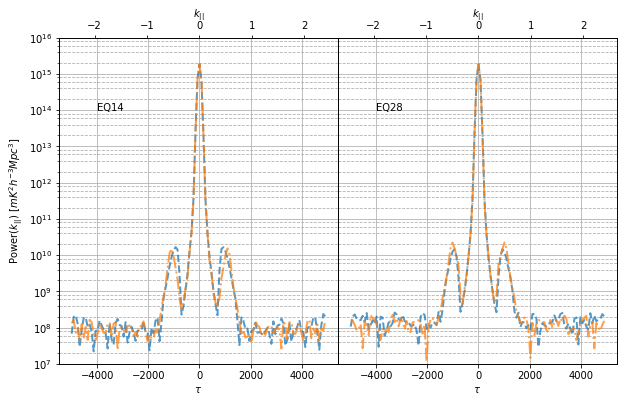

In [106]:
fig = plt.figure(figsize=(10,6))
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.0, hspace=0) # set the spacing between axes. 

ax1 = fig.add_subplot(gs1[0])
ax1.plot(delay_range,ds_eq14_xx*scale_eq14_xx*conversion_scalar*convert_jy_to_mk,linewidth=2.0,linestyle='--',alpha=0.75)
ax1.plot(delay_range,ds_eq14_yy*scale_eq14_yy*conversion_scalar*convert_jy_to_mk,linewidth=2.0,linestyle='-.',alpha=0.75)
ax1.set_yscale('log')
ax1.set_xlabel(r'$\tau$')
ax1.set_ylabel(r'Power($k_{||}$) [$mK^2 h^{-3} Mpc^3$]')
ax2 = fig.add_subplot(gs1[1])
ax2.plot(delay_range,ds_eq28_xx*scale_eq28_xx*conversion_scalar*convert_jy_to_mk,linewidth=2.0,linestyle='--',alpha=0.75)
ax2.plot(delay_range,ds_eq28_yy*scale_eq28_yy*conversion_scalar*convert_jy_to_mk,linewidth=2.0,linestyle='-.',alpha=0.75)
ax2.set_xlabel(r'$\tau$')
ax2.set_yscale('log')

ax2.tick_params(
axis='both',
    which='both',
left=False)
ax2.set_yticks([])

ax1.set_ylim([10e6,10e15])
ax2.set_ylim([10e6,10e15])
locmaj = mpl.ticker.LogLocator(base=10,numticks=10) 
locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=10)
ax1.yaxis.set_major_locator(locmaj)
ax1.yaxis.set_minor_locator(locmin)
ax1.grid(True,which="major")
ax1.grid(True,which='minor',ls='--')
ax2.yaxis.set_major_locator(locmaj)
ax2.yaxis.set_minor_locator(locmin)
ax2.yaxis.set_major_formatter(mpl.ticker.NullFormatter())
ax2.grid(True,which="major")
ax2.grid(True,which='minor',ls='--')
ax1.annotate('EQ14', (-4000,1e14))
ax2.annotate('EQ28', (-4000,1e14))
# Setup twin axes 

ax3 = ax1.twiny()
ax3.plot(k_parallel_range,numpy.zeros(128))
ax3.set_xlabel(r'$k_{||}$')
ax4 = ax2.twiny()
ax4.plot(k_parallel_range,numpy.zeros(128))
ax4.set_xlabel(r'$k_{||}$')

plt.savefig("delay_spectrum_cosmo.pdf")
plt.show()

Do the same again, but for the real parts

In [107]:
fin_eq14_xx_real = numpy.load("/Users/jameskent/Downloads/delay_spectrum_data/eq14_xx_low_real.npz")
fin_eq28_xx_real = numpy.load("/Users/jameskent/Downloads/delay_spectrum_data/eq28_xx_low_real.npz")
fin_eq14_yy_real = numpy.load("/Users/jameskent/Downloads/delay_spectrum_data/eq14_yy_low_real.npz")
fin_eq28_yy_real = numpy.load("/Users/jameskent/Downloads/delay_spectrum_data/eq28_yy_low_real.npz")

In [108]:
ds_eq14_xx_real = fin_eq14_xx_real['delay_spectrum']
ds_eq28_xx_real = fin_eq28_xx_real['delay_spectrum']
ds_eq14_yy_real = fin_eq14_yy_real['delay_spectrum']
ds_eq28_yy_real = fin_eq28_yy_real['delay_spectrum']

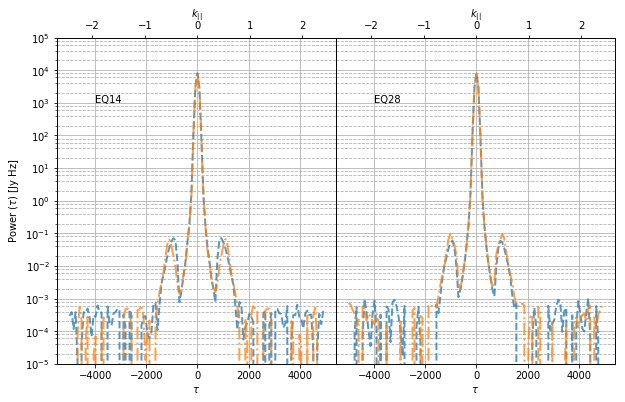

In [109]:
fig = plt.figure(figsize=(10,6))
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.0, hspace=0) # set the spacing between axes. 

ax1 = fig.add_subplot(gs1[0])
ax1.plot(delay_range,ds_eq14_xx_real*scale_eq14_xx,linewidth=2.0,linestyle='--',alpha=0.75)
ax1.plot(delay_range,ds_eq14_yy_real*scale_eq14_yy,linewidth=2.0,linestyle='-.',alpha=0.75)
ax1.set_yscale('log')
ax1.set_xlabel(r'$\tau$')
ax1.set_ylabel(r'Power ($\tau$) [Jy Hz]')
ax2 = fig.add_subplot(gs1[1])
ax2.plot(delay_range,ds_eq28_xx_real*scale_eq28_xx,linewidth=2.0,linestyle='--',alpha=0.75)
ax2.plot(delay_range,ds_eq28_yy_real*scale_eq28_yy,linewidth=2.0,linestyle='-.',alpha=0.75)
ax2.set_xlabel(r'$\tau$')
ax2.set_yscale('log')

ax2.tick_params(
axis='both',
    which='both',
left=False)
ax2.set_yticks([])

ax1.set_ylim([10e-6,10e4])
ax2.set_ylim([10e-6,10e4])
locmaj = mpl.ticker.LogLocator(base=10,numticks=11) 
locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=11)
ax1.yaxis.set_major_locator(locmaj)
ax1.yaxis.set_minor_locator(locmin)
ax1.grid(True,which="major")
ax1.grid(True,which='minor',ls='--')
ax2.yaxis.set_major_locator(locmaj)
ax2.yaxis.set_minor_locator(locmin)
ax2.yaxis.set_major_formatter(mpl.ticker.NullFormatter())
ax2.grid(True,which="major")
ax2.grid(True,which='minor',ls='--')
ax1.annotate('EQ14', (-4000,1000))
ax2.annotate('EQ28', (-4000,1000))
# Setup twin axes 

ax3 = ax1.twiny()
ax3.plot(k_parallel_range,numpy.zeros(128))
ax3.set_xlabel(r'$k_{||}$')
ax4 = ax2.twiny()
ax4.plot(k_parallel_range,numpy.zeros(128))
ax4.set_xlabel(r'$k_{||}$')

plt.savefig("delay_spectrum_jansky_real.pdf")
plt.show()




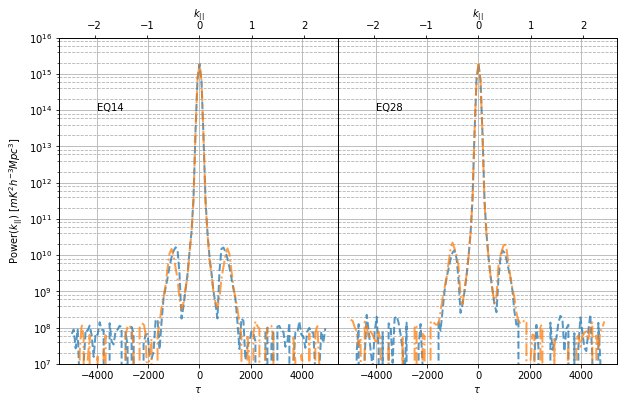

In [110]:
fig = plt.figure(figsize=(10,6))
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.0, hspace=0) # set the spacing between axes. 

ax1 = fig.add_subplot(gs1[0])
ax1.plot(delay_range,ds_eq14_xx_real*scale_eq14_xx*conversion_scalar*convert_jy_to_mk,linewidth=2.0,linestyle='--',alpha=0.75)
ax1.plot(delay_range,ds_eq14_yy_real*scale_eq14_yy*conversion_scalar*convert_jy_to_mk,linewidth=2.0,linestyle='-.',alpha=0.75)
ax1.set_yscale('log')
ax1.set_xlabel(r'$\tau$')
ax1.set_ylabel(r'Power($k_{||}$) [$mK^2 h^{-3} Mpc^3$]')
ax2 = fig.add_subplot(gs1[1])
ax2.plot(delay_range,ds_eq28_xx_real*scale_eq28_xx*conversion_scalar*convert_jy_to_mk,linewidth=2.0,linestyle='--',alpha=0.75)
ax2.plot(delay_range,ds_eq28_yy_real*scale_eq28_yy*conversion_scalar*convert_jy_to_mk,linewidth=2.0,linestyle='-.',alpha=0.75)
ax2.set_xlabel(r'$\tau$')
ax2.set_yscale('log')

ax2.tick_params(
axis='both',
    which='both',
left=False)
ax2.set_yticks([])

ax1.set_ylim([10e6,10e15])
ax2.set_ylim([10e6,10e15])
locmaj = mpl.ticker.LogLocator(base=10,numticks=11) 
locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=11)
ax1.yaxis.set_major_locator(locmaj)
ax1.yaxis.set_minor_locator(locmin)
ax1.grid(True,which="major")
ax1.grid(True,which='minor',ls='--')
ax2.yaxis.set_major_locator(locmaj)
ax2.yaxis.set_minor_locator(locmin)
ax2.yaxis.set_major_formatter(mpl.ticker.NullFormatter())
ax2.grid(True,which="major")
ax2.grid(True,which='minor',ls='--')
ax1.annotate('EQ14', (-4000,1e14))
ax2.annotate('EQ28', (-4000,1e14))
# Setup twin axes 

ax3 = ax1.twiny()
ax3.plot(k_parallel_range,numpy.zeros(128))
ax3.set_xlabel(r'$k_{||}$')
ax4 = ax2.twiny()
ax4.plot(k_parallel_range,numpy.zeros(128))
ax4.set_xlabel(r'$k_{||}$')

plt.savefig("delay_spectrum_cosmo_real.pdf")
plt.show()